In [4]:
# import pandas
import pandas as pd


In [5]:
#Connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

# Connect with directory and data file, read number of columns and record
directory = "/content/drive/MyDrive/Travel tide project"

df_session_base = pd.read_csv(directory + "/travel_tide.csv")
#df_session_base = pd.read_csv(directory + "/not_canceled_trips.csv")


print(df_session_base.shape)
display(df_session_base.head())

(49211, 41)


,session_id,user_id,trip_id,session_start,session_end,page_clicks,flight_discount,flight_discount_amount,hotel_discount,hotel_discount_amount,...,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_price_per_room_night_usd
0,698573-73a3ebb5d73a4076894b5952170beac9,698573,NaN,2023-03-27 20:01:00,2023-03-27 20:04:03,25,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,474007-040d8694832845e98a710bfc20194f52,474007,NaN,2023-03-28 21:35:00,2023-03-28 21:35:24,3,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,491175-456ae210ac9c4150800565740316dc77,491175,NaN,2023-03-28 19:14:00,2023-03-28 19:15:16,10,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,520603-67823ebddae848398ce155649a426242,520603,NaN,2023-03-28 16:38:00,2023-03-28 16:38:45,6,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,524180-e1e5d53c38114c8bbd236d9f603546ca,524180,NaN,2023-03-28 18:56:00,2023-03-28 18:57:38,13,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the next cell two data frames will be created, data types will be standardized  and several  coulumns will be converted  from text into proper datetime format in both DataFrames so that time-based calculations and analysis can be performed correctly


In [7]:
# two data frames: data type standardization and date conversion
df_trips = df_session_base.convert_dtypes()
df_session_base = df_session_base.convert_dtypes()

cols = ['session_start', 'session_end', 'birthdate', 'sign_up_date', 'departure_time', 'return_time', 'check_in_time', 'check_out_time']

for c in cols:
  df_trips[c] = pd.to_datetime(df_trips[c], format='mixed')
  df_session_base[c] = pd.to_datetime(df_session_base[c], format='mixed')

I converted selected timestamp columns into proper datetime format and then calculated the length of each session in seconds by subtracting start time from end time.

In [8]:
datetime_cols = ['session_start', 'session_end', 'departure_time', 'return_time']

for col in datetime_cols:
    df_session_base[col] = pd.to_datetime(df_session_base[col], format='mixed')

df_session_base['session_duration'] = (df_session_base['session_end'] - df_session_base['session_start']).dt.total_seconds()
display(df_session_base[['session_start', 'session_end', 'session_duration']].head(1))

,session_start,session_end,session_duration
0,2023-03-27 20:01:00,2023-03-27 20:04:03,183.0


# To read number of null in different columns

In [9]:

df_session_base.isnull().sum()


,0
session_id,0
user_id,0
trip_id,32509
session_start,0
session_end,0
page_clicks,0
flight_discount,0
flight_discount_amount,40929
hotel_discount,0
hotel_discount_amount,43006


# Show the summary statisstics of df session (transposed)

In [23]:
# Show the summary statisstics of df session (transposed)
df_session_base.describe().T.round(2)


,count,mean,min,25%,50%,75%,max,std
user_id,49211.0,545282.694946,23557.0,517119.0,540308.0,573922.0,844489.0,64640.047648
session_start,49211,2023-03-21 11:25:24.870191616,2023-01-04 00:01:00,2023-02-05 22:31:30,2023-03-09 11:04:00,2023-04-28 11:23:00,2023-07-28 19:58:52,NaN
session_end,49211,2023-03-21 11:28:32.122520320,2023-01-04 00:04:23,2023-02-05 22:34:10.500000,2023-03-09 11:06:35,2023-04-28 11:25:11.500000,2023-07-28 20:08:52,NaN
page_clicks,49211.0,17.588791,1.0,6.0,13.0,22.0,566.0,21.495987
flight_discount_amount,8282.0,0.139864,0.05,0.1,0.1,0.2,0.6,0.083914
hotel_discount_amount,6205.0,0.112192,0.05,0.05,0.1,0.15,0.45,0.062119
birthdate,49211,1982-02-26 19:15:57.371319424,1935-05-10 00:00:00,1974-09-08 00:00:00,1981-10-09 00:00:00,1989-03-16 00:00:00,2006-12-28 00:00:00,NaN
home_airport_lat,49211.0,38.427222,21.316,33.818,39.103,42.238,61.251,6.185962
home_airport_lon,49211.0,-94.183762,-157.927,-112.383,-90.035,-79.37,-63.499,18.065868
sign_up_date,49211,2023-01-20 00:56:58.357683968,2021-07-22 00:00:00,2023-01-08 00:00:00,2023-01-19 00:00:00,2023-02-05 00:00:00,2023-05-18 00:00:00,NaN


I filtered the dataset to find trips with zero or negative nights, selected relevant columns, and displayed two sample rows for inspection.

In [11]:
df_session_base[df_session_base['nights'] <= 0][['trip_id', 'check_in_time', 'check_out_time', 'nights']].head(2)

,trip_id,check_in_time,check_out_time,nights
2434,665593-258e19907f8f40f08a502f8754990d5c,2023-07-07 14:11:49.380,2023-07-07 11:00:00,-1
2763,500974-8e81ae6ba3544ed6bf519a342f5ac9b8,2023-01-26 14:01:28.335,2023-01-27 11:00:00,0


# Convert 'birthdate' to datetime objects  (Request of learning Journey)

In [12]:
# Convert 'birthdate' to datetime objects  (Request of learning Journey)
df_session_base['birthdate'] = pd.to_datetime(df_session_base['birthdate'])

# Display the earliest and latest birthdates
print(f"Earliest birthdate: {df_session_base['birthdate'].min()}")
print(f"Latest birthdate: {df_session_base['birthdate'].max()}")

Earliest birthdate: 1935-05-10 00:00:00
Latest birthdate: 2006-12-28 00:00:00


In [24]:
# Extract birth year( Request of learning Journey)
df_session_base['birth_year'] = df_session_base['birthdate'].dt.year

# Get the current year to calculate age
current_year = pd.to_datetime('today').year

# Calculate age
df_session_base['age'] = current_year - df_session_base['birth_year']

# Display summary statistics for age
print("Summary statistics for Age:" )
display((df_session_base['age'].describe().round(1).to_frame()
    .T))

Summary statistics for Age:


,count,mean,std,min,25%,50%,75%,max
age,49211.0,44.3,12.0,20.0,37.0,45.0,52.0,91.0


In [14]:
# Display the distribution of birth years(Request of learning Journey))
print("Top 10 most common birth years:")
display(df_session_base['birth_year'].value_counts().head(10))

Top 10 most common birth years:


,count
birth_year,
1985,2026
2006,1911
1981,1854
1983,1850
1978,1831
1980,1825
1982,1811
1976,1765
1986,1734


I filtered the dataset to show sessions with at least 100 page clicks and displayed key columns to analyze high-engagement user behavior.

In [15]:
# high engagement behaviour(?)
df_session_base[df_session_base['page_clicks'] >= 100][['user_id', 'trip_id', 'hotel_booked', 'flight_booked', 'session_duration', 'page_clicks']]

,user_id,trip_id,hotel_booked,flight_booked,session_duration,page_clicks
376,626520,<NA>,False,False,792.0,107
813,525176,<NA>,False,False,797.0,108
950,499780,<NA>,False,False,1933.0,262
1283,567651,<NA>,False,False,1933.0,261
1311,589650,<NA>,False,False,894.0,121
...,...,...,...,...,...,...
49149,486751,486751-ac8269b44cf44e37a344c955f34f6146,True,True,7200.0,200
49170,565565,565565-5fcbfd8953e14ddeb5b4d17878327b11,True,True,7200.0,200
49180,565565,565565-5fcbfd8953e14ddeb5b4d17878327b11,True,False,906.0,122
49189,542095,542095-da1172e2431342eba39c1630cbf81673,True,True,895.0,121


# New column Marriage status based on the 'married' column (EDA)

In [16]:
# New column Marriage status based on the 'married' column (EDA)
df_session_base['marriage_status'] = df_session_base['married'].map({True: 'Married', False: 'Not Married'})

print("Marriage Status Distribution:")
display(df_session_base['marriage_status'].value_counts())

Marriage Status Distribution:


,count
marriage_status,
Not Married,27465
Married,21746


# EDA graphs


--- Generating Visualizations for df_session ---


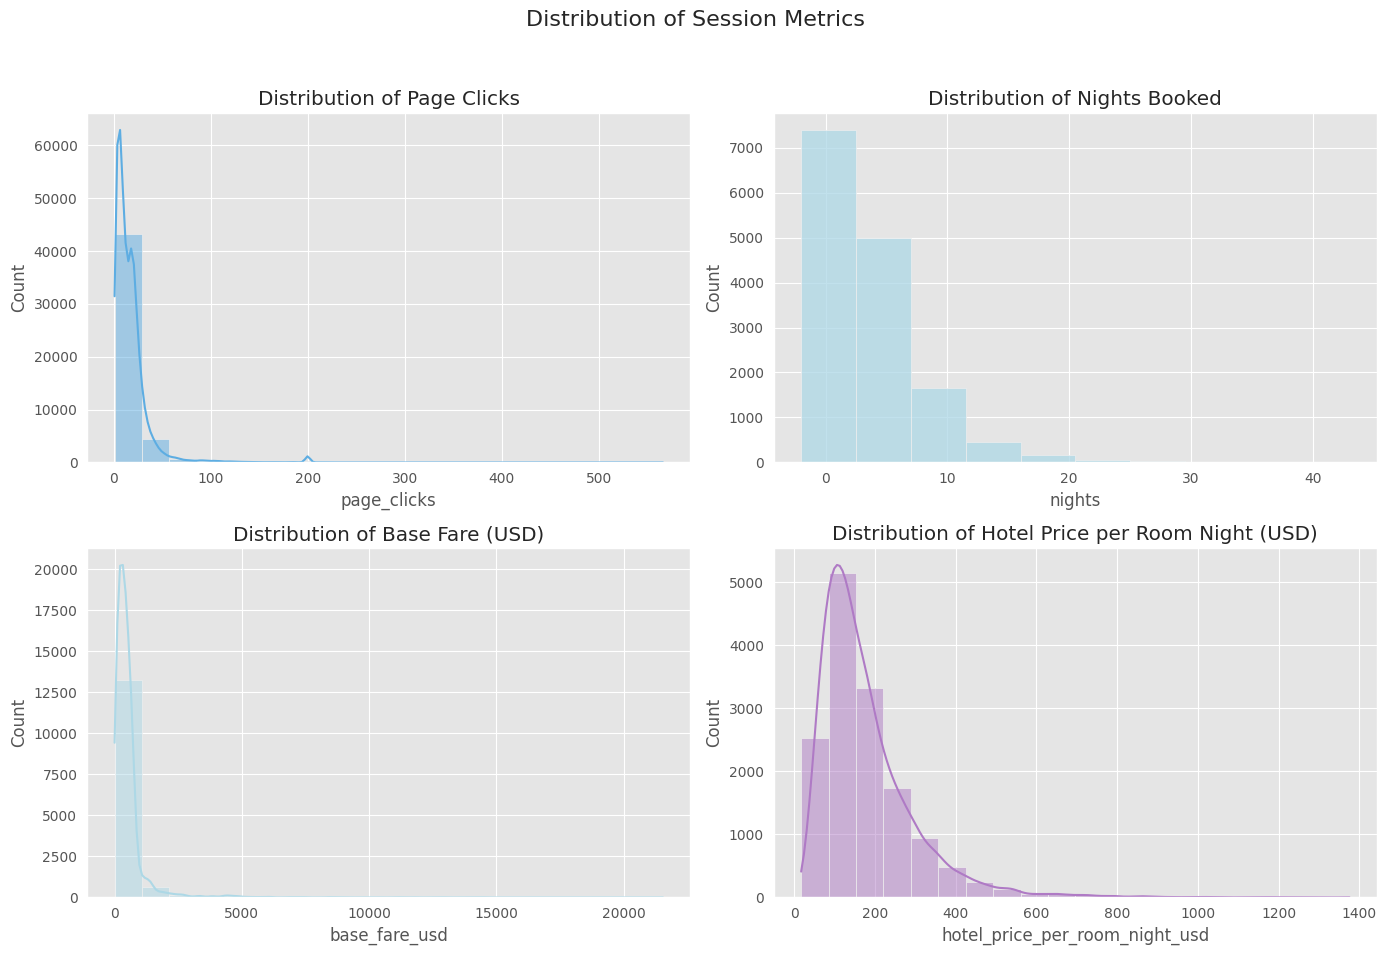

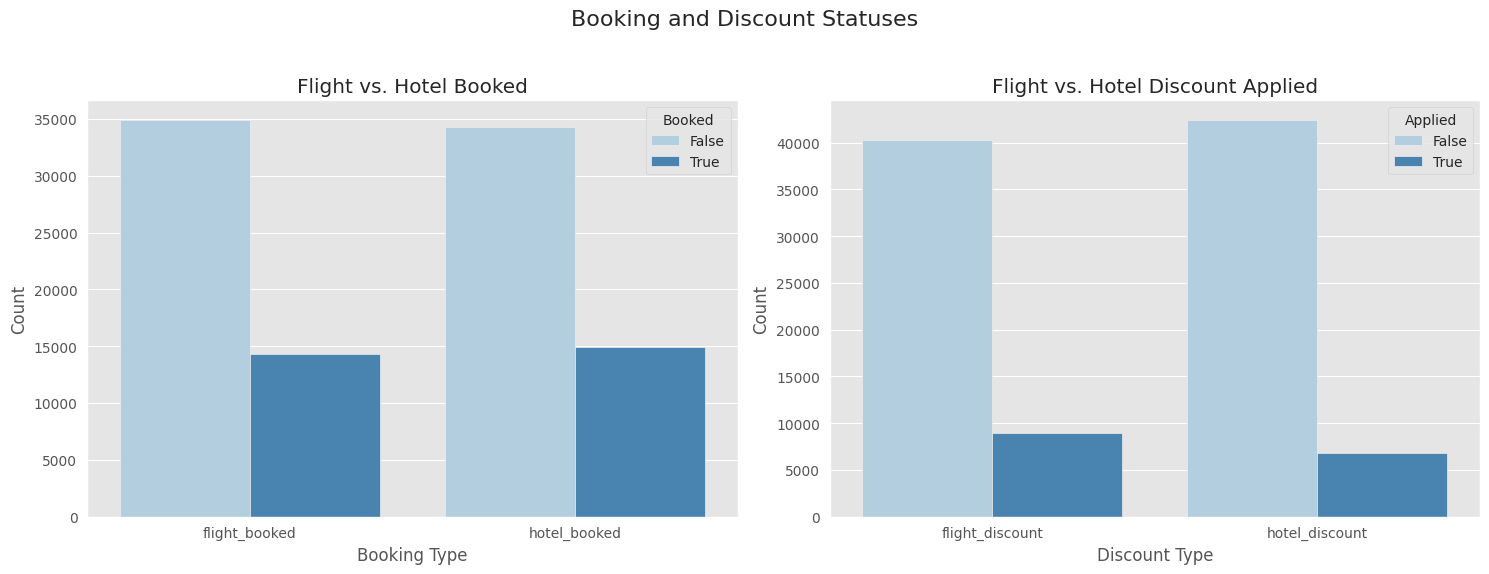

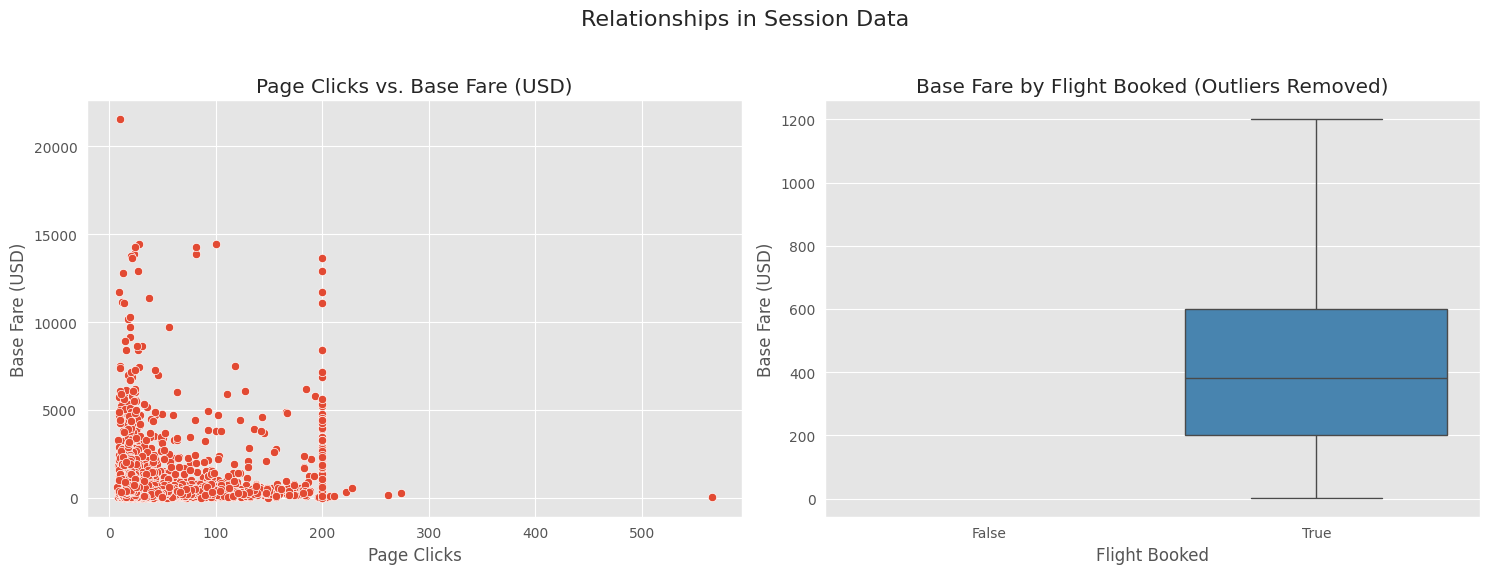

In [17]:
#EDA graphs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_session_base.copy()

light_blue = "#ADD8E6"   # Light blue color

sns.set_style("whitegrid")
plt.style.use("ggplot")

print("\n--- Generating Visualizations for df_session ---")

# --- Figure 1: Distribution plots ---
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Distribution of Session Metrics', fontsize=16)

sns.histplot(df['page_clicks'], bins=20, kde=True, color="#5DADE2", ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Page Clicks')

sns.histplot(df['nights'], bins=10, kde=False, color=light_blue, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Nights Booked')

sns.histplot(df['base_fare_usd'], bins=20, kde=True, color= light_blue, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Base Fare (USD)')

sns.histplot(df['hotel_price_per_room_night_usd'], bins=20, kde=True, color="#AF7AC5", ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Hotel Price per Room Night (USD)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Figure 2: Categorical count plots ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Booking and Discount Statuses', fontsize=16)

booked_df = df[['flight_booked', 'hotel_booked']].melt(
    var_name='Booking Type', value_name='Booked')
sns.countplot(x='Booking Type', hue='Booked', data=booked_df, ax=axes[0], palette="Blues")
axes[0].set_title('Flight vs. Hotel Booked')
axes[0].set_xlabel('Booking Type')
axes[0].set_ylabel('Count')

# Count plot for flight and hotel discounts
discount_df = df[['flight_discount', 'hotel_discount']].melt(var_name='Discount Type', value_name='Applied')
sns.countplot(x='Discount Type', hue='Applied', data=discount_df,palette="Blues", ax=axes[1])
axes[1].set_title('Flight vs. Hotel Discount Applied')
axes[1].set_xlabel('Discount Type')
axes[1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Figure 3: Relationship plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Relationships in Session Data', fontsize=16)

# Scatter plot: Page clicks vs. Base fare
sns.scatterplot(x='page_clicks', y='base_fare_usd', data=df, ax=axes[0])
axes[0].set_title('Page Clicks vs. Base Fare (USD)')
axes[0].set_xlabel('Page Clicks')
axes[0].set_ylabel('Base Fare (USD)')

# Box plot: Base fare by flight booked
sns.boxplot(
    x='flight_booked',
    y='base_fare_usd',
    hue='flight_booked',
    data=df,
    palette="Blues",
    ax=axes[1],
    showfliers=False,
    legend=False
)

axes[1].set_title('Base Fare by Flight Booked (Outliers Removed)')
axes[1].set_xlabel('Flight Booked')
axes[1].set_ylabel('Base Fare (USD)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Histogram session duration

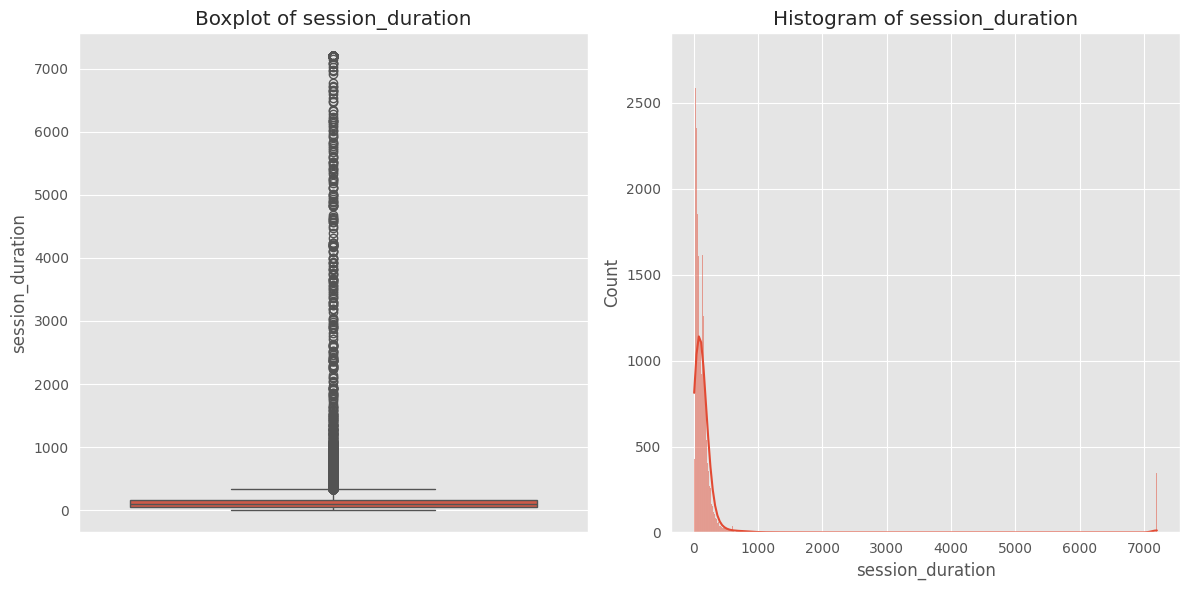

In [18]:
# Historgraph/plot session duration
def plot_distribution(df, column_name):

  import matplotlib.pyplot as plt
  import seaborn as sns
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Boxplot
  sns.boxplot(y=df[column_name], ax=axes[0])
  axes[0].set_title(f'Boxplot of {column_name}')

  # Histogram
  sns.histplot(df[column_name], ax=axes[1], kde=True)
  axes[1].set_title(f'Histogram of {column_name}')

  plt.tight_layout()
  plt.show()
  import matplotlib.pyplot as plt
plot_distribution(df_session_base, 'session_duration')



#Flight destination by volumn(number of flights per destination -map)

In [19]:

#Flight destination by volumn(map)

df = df[["destination_airport_lon", "destination_airport_lat", 'destination']].copy()
df.dropna(inplace=True)

print(df.shape)

import plotly.express as px
import pandas as pd

#  Aggregate the data: Count flights per destination

map_df = df.groupby(['destination', 'destination_airport_lat', 'destination_airport_lon']).size().reset_index(name='flight_count')


fig = px.scatter_geo(
    map_df,
    lat='destination_airport_lat',
    lon='destination_airport_lon',
    size='flight_count',
    hover_name='destination',
    projection="natural earth",
    title='Flight Destinations by Volume',
    template='plotly_white'
)

fig.update_traces(marker=dict(color='Green', line=dict(width=2, color='Blue')))


fig.show()

(14270, 3)


Handling outliers in two methods, removing the outliers and clipping of outliers

In [20]:
#Removes outliers from a specified column in a DataFrame using the IQR method, prepared for general use.
def remove_outliers_iqr(df, column_name):

  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 5 * IQR
  upper_bound = Q3 + 5 * IQR

  original_rows = df.shape[0]
  df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)].copy()
  removed_rows = original_rows - df_cleaned.shape[0]

  print(f"Removed {removed_rows} outliers from the '{column_name}' column.")

  return df_cleaned

Removed 831 outliers from the 'session_duration' column.


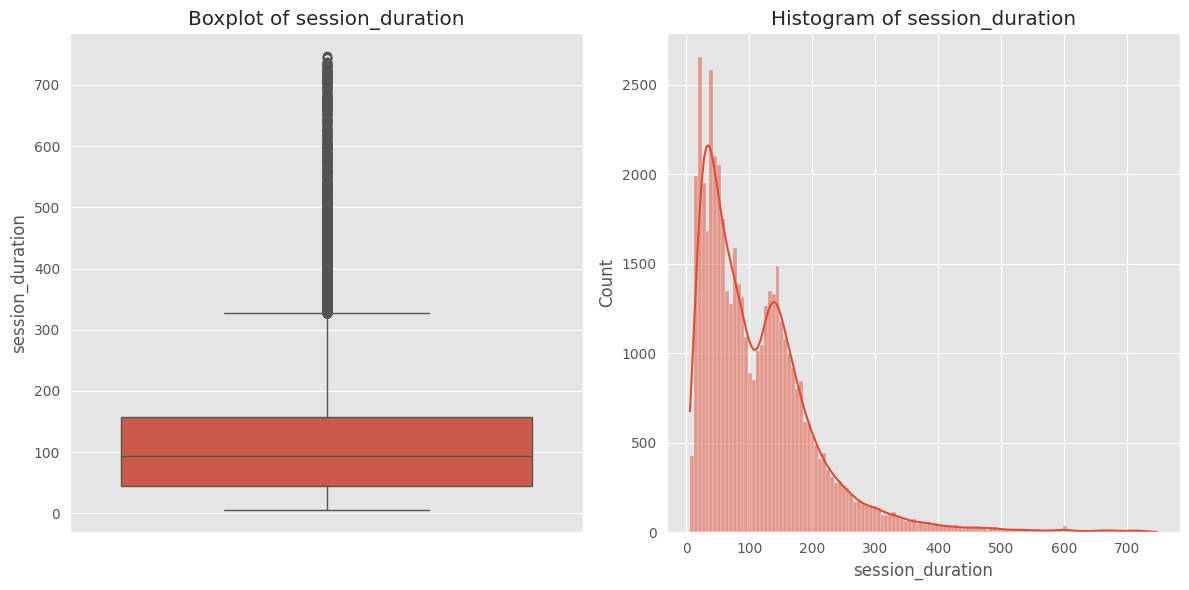

In [21]:
# Outlier removed from session duration and graph
df_cleaned = remove_outliers_iqr(df_session_base, 'session_duration')
plot_distribution(df_cleaned, 'session_duration')

In [27]:
#clip outliers
def clip_outliers_iqr(df, column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Using 5 * IQR for consistency with the remove_outliers_iqr function
  lower_bound = Q1 - 5 * IQR
  upper_bound = Q3 + 5 * IQR

  df_clipped = df.copy()
  df_clipped[column_name] = df_clipped[column_name].clip(lower=lower_bound, upper=upper_bound)

  print(f"Clipped outliers in the '{column_name}' column using IQR method.")
  return df_clipped

df_session_clip = clip_outliers_iqr(df_session_base, "page_clicks")
df_session_clip = clip_outliers_iqr(df_session_clip, "session_duration")
#remove outliers
df_session_rm = remove_outliers_iqr(df_session_base, "page_clicks")
df_session_rm = remove_outliers_iqr(df_session_rm, "session_duration")

Clipped outliers in the 'page_clicks' column using IQR method.
Clipped outliers in the 'session_duration' column using IQR method.
Removed 605 outliers from the 'page_clicks' column.
Removed 241 outliers from the 'session_duration' column.


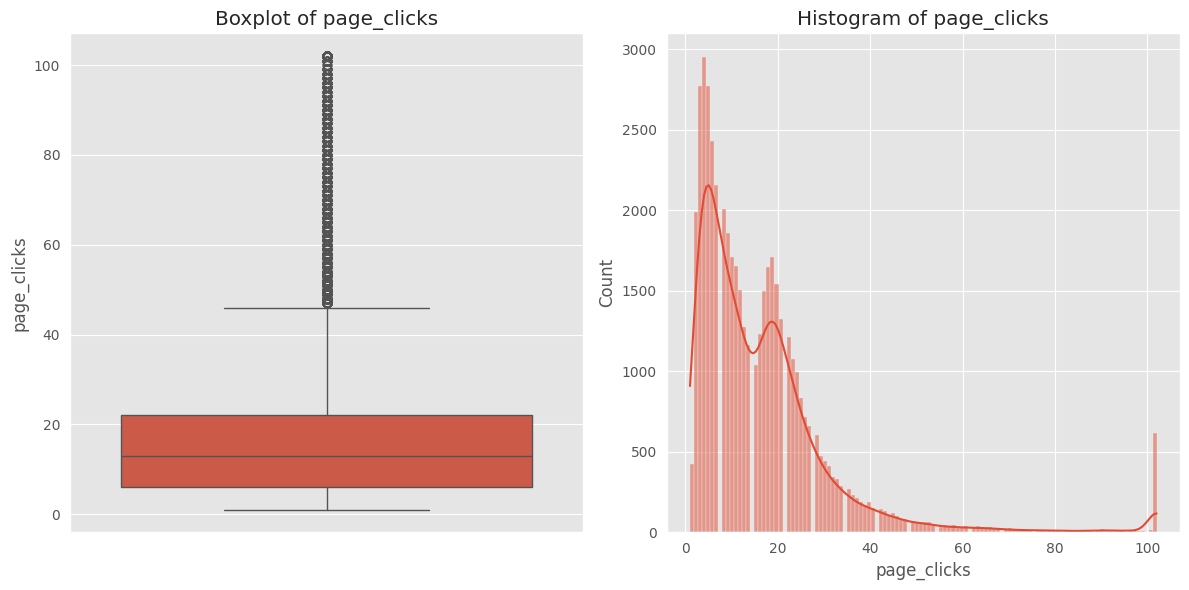

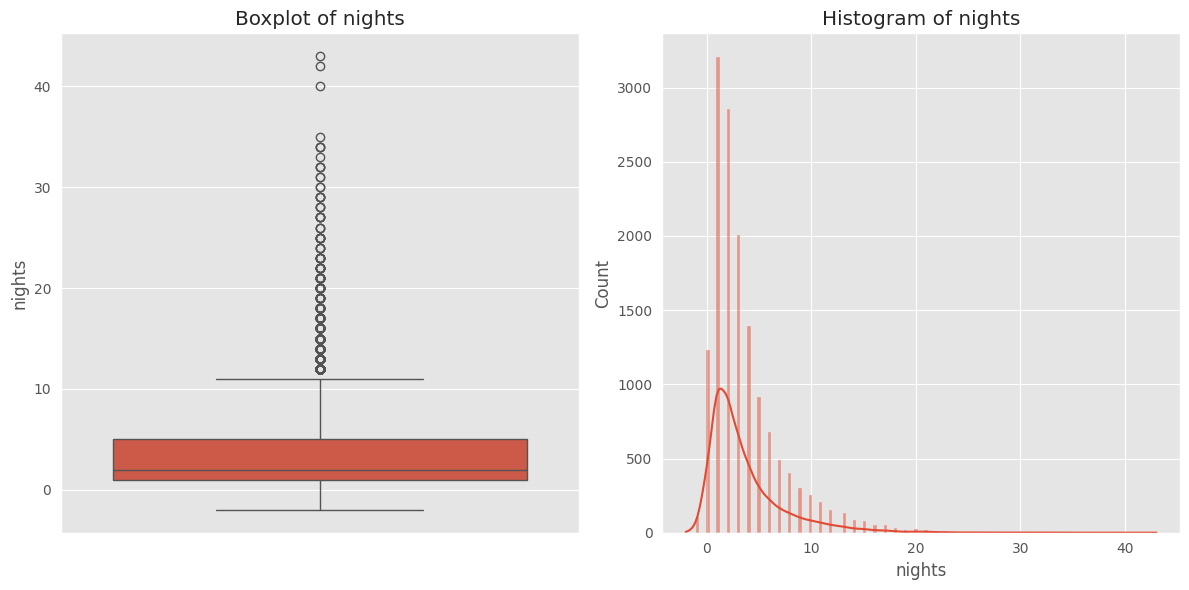

In [28]:
plot_distribution(df_session_clip, 'page_clicks')
plot_distribution(df_session_base, "nights")

#Number of nights (Hotel) -2 and-1 nights changed to Zero

In [30]:
#Number of nights (Hotel)
import pandas as pd

nights_distribution = (
    df_session_base.groupby("nights")
          .size()
          .reset_index(name="rows")
          .sort_values("nights")
)
df_session_base.loc[df_session_base["nights"] < 0, "nights"] = 0 #-2 and -1 nights changed to zero.
print(nights_distribution)

    nights  rows
0        0  1335
1        1  3205
2        2  2852
3        3  2004
4        4  1392
5        5   915
6        6   677
7        7   489
8        8   401
9        9   300
10      10   251
11      11   204
12      12   155
13      13   130
14      14    86
15      15    80
16      16    50
17      17    49
18      18    30
19      19    16
20      20    23
21      21    21
22      22    11
23      23     9
24      24     4
25      25     7
26      26     3
27      27     5
28      28     3
29      29     4
30      30     2
31      31     2
32      32     3
33      33     1
34      34     3
35      35     1
36      40     1
37      42     1
38      43     1


#  if trip includes a flight, a hotel, both, or neither, and counts how many trips fall into each category.

In [32]:
# How many trips had flights and hotels or any of them
trip_summary = df_session_base.groupby("trip_id").agg(
    has_flight=("departure_time", lambda x: x.notna().any()),
    has_hotel=("hotel_name", lambda x: x.notna().any())
).reset_index()

print(trip_summary[["has_flight", "has_hotel"]].value_counts())

has_flight  has_hotel
True        True         11931
False       True          2382
True        False         1786
Name: count, dtype: int64


In [33]:
#I filtered trip rows, cleaned numeric data, calculated per-row spending,
# and aggregated everything into a clean trip-level dataset with total costs per trip.

df_trip = df_session_base[df_session_base["trip_id"].notna()].copy()

# Convert numeric columns safely
num_cols = ["seats", "base_fare_usd", "nights", "rooms", "hotel_price_per_room_night_usd"]
for c in num_cols:
    df_trip[c] = pd.to_numeric(df_trip[c], errors="coerce").fillna(0)

# Clean invalid nights
df_trip.loc[df_trip["nights"] <= 0, "nights"] = 0

# Spend per row
df_trip["flight_spend_row"] = df_trip["seats"] * df_trip["base_fare_usd"]
df_trip["hotel_spend_row"] = (
    df_trip["nights"] * df_trip["rooms"] * df_trip["hotel_price_per_room_night_usd"]
)
df_trip["total_spend_row"] = df_trip["flight_spend_row"] + df_trip["hotel_spend_row"]

# Aggregate to trip-level
trip_table = (
    df_trip.groupby("trip_id", as_index=False)
    .agg(
        user_id=("user_id", "first"),
        destination=("destination", "first"),
        trip_airline=("trip_airline", "first"),
        origin_airport=("origin_airport", "first"),
        destination_airport=("destination_airport", "first"),
        departure_time=("departure_time", "first"),
        return_time=("return_time", "first"),

        hotel_name=("hotel_name", "first"),
        total_nights=("nights", "sum"),
        total_rooms=("rooms", "sum"),

        flight_spend=("flight_spend_row", "sum"),
        hotel_spend=("hotel_spend_row", "sum"),
        total_spend=("total_spend_row", "sum")
    )
)

trip_table.head(2)

,trip_id,user_id,destination,trip_airline,origin_airport,destination_airport,departure_time,return_time,hotel_name,total_nights,total_rooms,flight_spend,hotel_spend,total_spend
0,101486-1015905607d74b15954bfd4ac7029ef3,101486,edmonton,United Airlines,TCM,YED,2023-06-10 10:00:00,2023-06-14 10:00:00,Crowne Plaza - edmonton,3,1,189.91,759,948.91
1,101486-6759c5dd49a1457d916bb2bbf48c3115,101486,<NA>,<NA>,<NA>,<NA>,NaT,NaT,Banyan Tree - montreal,5,2,0.0,1440,1440.0


#Aggreates of nights, rooms, flight and hotel spending at user ID level

In [34]:
#Aggreates of nights, rooms, flight and hotel spending at user ID level
user_table = (
    trip_table
    .groupby("user_id", as_index=False)
    .agg(
        total_nights=("total_nights", "sum"),
        total_rooms=("total_rooms", "sum"),
        total_flight_spend=("flight_spend", "sum"),
        total_hotel_spend=("hotel_spend", "sum"),
        total_spend=("total_spend", "sum")
    )
)

user_table.head()

,user_id,total_nights,total_rooms,total_flight_spend,total_hotel_spend,total_spend
0,23557,20,3,0.0,3802,3802.0
1,94883,1,3,1487.26,130,1617.26
2,101486,8,3,189.91,2199,2388.91
3,101961,19,5,1242.66,2429,3671.66
4,106907,22,6,166824.72,8514,175338.72


# Finding canceled and not canceled trips

In [35]:
#find canceled sessions from SQL database
import pandas as pd
from sqlalchemy import create_engine

# Define your PostgreSQL connection parameters
username = 'Test'
password = 'bQNxVzJL4g6u'
host = 'ep-noisy-flower-846766.us-east-2.aws.neon.tech'        # or your DB host
port = '5432'             # default PostgreSQL port
database = 'TravelTide'

# Create connection string using SQLAlchemy
conn_str = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(conn_str)

query = '''
SELECT DISTINCT trip_id
FROM sessions
WHERE cancellation = TRUE
'''

canceled_trip_ids = set(pd.read_sql(query, engine)['trip_id'].values)
print('Number of canceled trips (total)', len(canceled_trip_ids))
engine.dispose()

Number of canceled trips (total) 90670


In [36]:
# counts rows per cancellation status
df_session_base.groupby("cancellation").size().reset_index(name="count")

,cancellation,count
0,False,48601
1,True,610


In [37]:
# Breakdown of Cancelled Trips by Booking Type
cancelled_trips_df = df_session_base[df_session_base['cancellation'] == True]

# Get unique cancelled trip IDs
unique_cancelled_trip_ids = cancelled_trips_df['trip_id'].unique()

# Define trip_summary
trip_summary = df_trip.groupby("trip_id").agg(
    has_flight=("departure_time", lambda x: x.notna().any()),
    has_hotel=("hotel_name", lambda x: x.notna().any())
).reset_index()

# Filter trip_summary to get details for only cancelled trips
cancelled_trip_details = trip_summary[trip_summary['trip_id'].isin(unique_cancelled_trip_ids)]


# Count the occurrences of each combination
cancellation_type_counts = cancelled_trip_details[['has_flight', 'has_hotel']].value_counts().reset_index(name='count')
cancellation_type_counts['booking_type'] = cancellation_type_counts.apply(
    lambda row: 'Flight and Hotel' if row['has_flight'] and row['has_hotel']
    else ('Flight Only' if row['has_flight']
    else ('Hotel Only' if row['has_hotel']
    else 'Unknown/Other')),
    axis=1
)

print("Breakdown of Cancelled Trips by Booking Type:")
display(cancellation_type_counts[['booking_type', 'count']])

Breakdown of Cancelled Trips by Booking Type:


,booking_type,count
0,Flight and Hotel,367
1,Flight Only,193
2,Hotel Only,50


In [38]:
#Only non-canceled trips and printed how many rows (sessions) those trips have.
df_temp = df_session_base.dropna(subset = ['trip_id'])
df_not_canceled_trips = df_temp[~df_temp['trip_id'].isin(canceled_trip_ids)]
print(df_not_canceled_trips.shape[0])

15489


In [39]:
# check number of null in df
print(df_not_canceled_trips.isnull().sum())

session_id                            0
user_id                               0
trip_id                               0
session_start                         0
session_end                           0
page_clicks                           0
flight_discount                       0
flight_discount_amount            13180
hotel_discount                        0
hotel_discount_amount             13347
flight_booked                         0
hotel_booked                          0
cancellation                          0
birthdate                             0
gender                                0
married                               0
has_children                          0
home_country                          0
home_city                             0
home_airport                          0
home_airport_lat                      0
home_airport_lon                      0
sign_up_date                          0
origin_airport                     2332
destination                        2332


#I cleaned trip IDs, counted sessions, trips, and canceled trips per user,and merged everything into a single user-level summary table

In [40]:
#I cleaned trip IDs, counted sessions, trips, and canceled trips per user,
# and merged everything into a single user-level summary table.

# Ensure column cleanliness if needed
df_session_base["trip_id"] = df_session_base["trip_id"].astype(str).str.strip()
df_session_base["trip_id"] = df_session_base["trip_id"].replace(["", "nan", "None", "null"], pd.NA)

# 1) Number of sessions per user
sessions_per_user = df_session_base.groupby("user_id")["session_id"].nunique().reset_index(name="num_sessions")

# 2) Number of trips per user (trip_id not null)
trips_per_user = (
    df_session_base[df_session_base["trip_id"].notna()]
    .groupby("user_id")["trip_id"]
    .nunique()
    .reset_index(name="num_trips")
)

# 3) Count canceled trips per user using the 'cancellation' column
# Filter for actual canceled entries where trip_id is also present
canceled_df = df_session_base[(df_session_base['cancellation'] == True) & (df_session_base['trip_id'].notna())]

canceled_trips_per_user = (
    canceled_df.groupby("user_id")["trip_id"]
    .nunique()
    .reset_index(name="num_canceled_trips")
)

# 4) Merge into one final table
user_summary = (
    sessions_per_user
    .merge(trips_per_user, on="user_id", how="left")
    .merge(canceled_trips_per_user, on="user_id", how="left")
)

# Fill missing (users with 0 trips or 0 canceled trips)
user_summary["num_trips"] = user_summary["num_trips"].fillna(0).astype(int)
user_summary["num_canceled_trips"] = user_summary["num_canceled_trips"].fillna(0).astype(int)

user_summary.head()

,user_id,num_sessions,num_trips,num_canceled_trips
0,23557,8,3,0
1,94883,8,3,0
2,101486,8,3,0
3,101961,8,6,0
4,106907,8,2,1


# I built user-level features counting how many trips each user canceled and how many trips they had in total.

In [41]:
df_user_base1 = canceled_df.groupby('user_id').agg(
 num_canceled_trips = ('trip_id', 'nunique')
).reset_index()

df_user_base2 = df_session_base[df_session_base['trip_id'].notna()].groupby('user_id').agg(
 num_trips = ('trip_id', 'nunique')
).reset_index()

df_user_base1= pd.merge(df_user_base1, df_user_base2, on='user_id', how='left')
df_user_base1.head()

,user_id,num_canceled_trips,num_trips
0,106907,1,2
1,171470,2,3
2,174997,1,4
3,182191,1,2
4,204943,1,7


### Comparing Number of Trips to Cancelled Trips

To understand the relationship between the total number of trips and cancelled trips, we can calculate a cancellation rate per user. This metric will show what percentage of a user's trips ended up being cancelled.

In [42]:
# Calculate cancellation rate, handling division by zero
user_summary['cancellation_rate'] = user_summary.apply(
    lambda row: (row['num_canceled_trips'] / row['num_trips']) if row['num_trips'] > 0 else 0,
    axis=1
)


print("Descriptive statistics for cancellation rate:")
display(user_summary['cancellation_rate'].describe().round(3)),

print("\nTop 10 users by cancellation rate (excluding users with 0 trips initially, if desired):")
display(user_summary[user_summary['num_trips'] > 0].sort_values(by='cancellation_rate', ascending=False).head(10))


plt.show()

Descriptive statistics for cancellation rate:


,cancellation_rate
count,5998.000
mean,0.029
std,0.095
min,0.000
25%,0.000
50%,0.000
75%,0.000
max,0.667



Top 10 users by cancellation rate (excluding users with 0 trips initially, if desired):


,user_id,num_sessions,num_trips,num_canceled_trips,cancellation_rate
15,171470,8,3,2,0.666667
460,484342,8,2,1,0.500000
194,431899,8,2,1,0.500000
449,482811,8,2,1,0.500000
5802,666292,8,2,1,0.500000
5929,709630,8,2,1,0.500000
3592,551622,8,2,1,0.500000
3774,555773,8,2,1,0.500000
4032,561908,9,4,2,0.500000
4397,571208,8,2,1,0.500000


I counted the number of flights per booking and calculated the actual money spent per flight and hotel after applying any discounts. I also calculated the advance booking time in days by measuring the difference between booking completion and travel departure.

In [43]:

# count number of Flights
import numpy as np
import pandas as pd

# Ensure boolean columns are treated as standard booleans (NA becomes False) for logical operations
flight_booked_bool = df_session_base['flight_booked'].fillna(False).astype(bool)
return_flight_booked_bool = df_session_base['return_flight_booked'].fillna(False).astype(bool)
flight_discount_bool = df_session_base['flight_discount'].fillna(False).astype(bool)
hotel_discount_bool = df_session_base['hotel_discount'].fillna(False).astype(bool)

# count number of Flights
df_session_base['num_flights'] = np.where(
    #if
    (flight_booked_bool == True) & (return_flight_booked_bool == True),
    2,
    #else
    np.where(
        (flight_booked_bool == True) & (return_flight_booked_bool == False),
        1,0
    )
)

df_session_base['money_spent_per_flight'] = np.where(
    (flight_discount_bool == True),
    df_session_base['base_fare_usd'] * (1 - df_session_base['flight_discount_amount']),
    df_session_base['base_fare_usd']
)

df_session_base['money_spent_per_seat'] = df_session_base['money_spent_per_flight'] / df_session_base['seats']

# money spent per hotel (total)
# rooms * nights * price_per_room_per_night
df_session_base['money_spent_total_hotel'] = df_session_base['rooms'] * df_session_base['nights'] * df_session_base['hotel_price_per_room_night_usd']

df_session_base['money_spent_per_hotel'] = np.where(
    (hotel_discount_bool == True),
    df_session_base['money_spent_total_hotel'] * (1 - df_session_base['hotel_discount_amount']),
    df_session_base['money_spent_total_hotel']
)

# Convert necessary columns to datetime
df_session_base['departure_time'] = pd.to_datetime(df_session_base['departure_time'], errors='coerce')
df_session_base['check_in_time'] = pd.to_datetime(df_session_base['check_in_time'], errors='coerce')
df_session_base['session_end'] = pd.to_datetime(df_session_base['session_end'], errors='coerce') # Added this line

# Time after booking
df_session_base['time_after_booking'] = np.where(
    (flight_booked_bool == True),
    (df_session_base['departure_time'] - df_session_base['session_end']).dt.days,
    (df_session_base['check_in_time'] - df_session_base['session_end']).dt.days
)
display(df_session_base[[
    'user_id',
    'flight_booked',
    'return_flight_booked',
    'num_flights',
    'money_spent_per_flight',
    'money_spent_per_seat',
    'money_spent_per_hotel',
    'time_after_booking'
]].head())

,user_id,flight_booked,return_flight_booked,num_flights,money_spent_per_flight,money_spent_per_seat,money_spent_per_hotel,time_after_booking
0,698573,False,<NA>,0,NaN,<NA>,NaN,NaN
1,474007,False,<NA>,0,NaN,<NA>,NaN,NaN
2,491175,False,<NA>,0,NaN,<NA>,NaN,NaN
3,520603,False,<NA>,0,NaN,<NA>,NaN,NaN
4,524180,False,<NA>,0,NaN,<NA>,NaN,NaN


In [47]:
display(df.head(2))

,destination_airport_lon,destination_airport_lat,destination
168,-118.408,33.942,los angeles
335,-73.417,45.517,montreal


In [48]:
df.to_csv(f'{directory}/session_base.csv', index=False)

In [49]:
# file downloaded
from google.colab import files

# Define the full path to the file
file_path = f'{directory}//session_base.csv'

# Download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>